In [1]:
import pandas as pd
import numpy as np
import names
import random
import matplotlib.pyplot as plt
import seaborn as sns
from randomtimestamp import randomtimestamp, random_date, random_time
from datetime import datetime
from datetime import timedelta
# Set figure size to (28,14)
plt.rcParams['figure.figsize'] = (28, 14)


In [2]:
#Display the number of customers at checkout (any state) over time

def question_03(df):
    df = pd.DataFrame(df.groupby(['location']).count()['customer_no'])
    return print(df)

In [3]:
#5 Calculate the total number of customers present in the supermarket over time.

def question_05(df):
    df = pd.DataFrame(df.groupby('timestamp').count()['customer_no'])
    sns.lineplot(data=df)

In [4]:
def question_04(df):
    df.reset_index(inplace=True)
    dict = {}
    for i in range(1,df['customer_no'].max(),1):
        print(df[df['customer_no'] == i].iloc[0, 0])
        a = df[df['customer_no'] == i].iloc[-1, 0] - \
            df[df['customer_no'] == i].iloc[0, 0]
        dict[i] = a
    return dict

In [5]:
# Create customer_id
def create_id(df, letters):
    df['customer_id'] = letters + '_' + df['customer_no'].astype(str)

In [6]:
# Function for sorting
def sort_df(df):
    df.sort_index(inplace=True)
    df.sort_values('customer_no', kind='stable', inplace=True)
    return df


In [7]:
# Function for filling
def filling_steps(df):
    df_n = df.groupby('customer_no').resample('1T').ffill()
    df_l = df_n[['customer_no', 'location']].set_index('customer_no')
    df_l.reset_index(inplace=True)
    return df_l


In [8]:
# Function for adding checkouts to customers without
def checkout(df):
    for i in range(1, df['customer_no'].max()+1, 1):
        if df[df['customer_no'] == i].iloc[-1, 1] != 'checkout':
            a = df[df['customer_no'] == i].iloc[0,0]
            a_df = pd.DataFrame({"customer_no":[a],'location':'checkout'})
            df = df.append(a_df, ignore_index=True)
    return sort_df(df)

In [9]:
# create Markov columns
def markov_columns(df):
    df["before"] = df['location']
    df['after'] = df['location'].shift(-1)
    df.loc[df['before'] == 'checkout', 'after'] = 'checkout'
    df.set_index('customer_id', inplace=True)
    df.drop(columns=['customer_no','location'], inplace=True)
    return df


In [10]:
df_0 = pd.read_csv('data/monday.csv', parse_dates=True, index_col=0, sep=';')
df_1 = pd.read_csv('data/tuesday.csv', parse_dates=True, index_col=0, sep=';')
df_2 = pd.read_csv('data/wednesday.csv', parse_dates=True, index_col=0, sep=';')
df_3 = pd.read_csv('data/thursday.csv', parse_dates=True, index_col=0, sep=';')
df_4 = pd.read_csv('data/friday.csv', parse_dates=True, index_col=0, sep=';')


In [11]:
df_lst = [df_0, df_1, df_2, df_3, df_4]
days = ['MO','TU','WE','TH','FR']

In [12]:
for i in range(len(df_lst)):
    df_lst[i] = sort_df(df_lst[i])  # df_0 = sort_df(df_0)
    df_lst[i] = filling_steps(df_lst[i])
    df_lst[i] = checkout(df_lst[i])
    create_id(df_lst[i],days[i])   # create_id(df_0, 'MO')


In [13]:
df_0.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:05:00,1,checkout
2019-09-02 07:03:00,2,dairy
2019-09-02 07:06:00,2,checkout
2019-09-02 07:04:00,3,dairy


In [14]:
df_lst[0].tail()

,customer_no,location,customer_id
10772,1445,checkout,MO_1445
10763,1446,dairy,MO_1446
10773,1446,checkout,MO_1446
10764,1447,fruit,MO_1447
10774,1447,checkout,MO_1447


In [15]:
#we create a list with every single df in order to concatenate them together
df = pd.concat(df_lst)
df.head()


,customer_no,location,customer_id
0,1,dairy,MO_1
1,1,dairy,MO_1
2,1,checkout,MO_1
3,2,dairy,MO_2
4,2,dairy,MO_2


In [16]:
df.tail()

,customer_no,location,customer_id
11065,1508,checkout,FR_1508
11066,1509,drinks,FR_1509
11074,1509,checkout,FR_1509
11067,1510,spices,FR_1510
11075,1510,checkout,FR_1510


In [17]:
df_duration_customer = pd.DataFrame(df['customer_id'].value_counts())
df_duration_customer

,customer_id
TH_1047,53
FR_102,53
MO_666,52
WE_710,52
FR_1238,50
...,...
MO_1242,2
FR_549,2
FR_461,2
WE_696,2


In [18]:
df_mar = markov_columns(df)
df_mar.head()


,before,after
customer_id,,
MO_1,dairy,dairy
MO_1,dairy,checkout
MO_1,checkout,checkout
MO_2,dairy,dairy
MO_2,dairy,dairy


In [19]:
df_mar.tail()

,before,after
customer_id,,
FR_1508,checkout,checkout
FR_1509,drinks,checkout
FR_1509,checkout,checkout
FR_1510,spices,checkout
FR_1510,checkout,checkout


In [20]:
df_mar.to_csv('df_mar.csv')

In [21]:
P = pd.crosstab(df_mar['before'], df_mar['after'], normalize=0)
P

after,checkout,dairy,drinks,fruit,spices
before,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


In [22]:
states = ['checkout','dairy','drinks',"fruit",'spices']

In [23]:
random.choice(states)

'dairy'

In [24]:
# probs is transition probability of states

probs = P.to_dict(orient='index')


In [25]:
# convert internal values, which is a dict to a list
for key in probs.keys():
    probs[key] = list(probs[key].values())

In [26]:
probs

{'checkout': [1.0, 0.0, 0.0, 0.0, 0.0],
 'dairy': [0.10346573646899966,
  0.7367503094407561,
  0.05856869584786767,
  0.04984809271970294,
  0.05136716552267357],
 'drinks': [0.2157104667900473,
  0.01089862224964014,
  0.5984988690108987,
  0.0879086983343615,
  0.08698334361505243],
 'fruit': [0.20160528800755428,
  0.09592382751022978,
  0.05484734025810513,
  0.5969468051621026,
  0.05067673906200818],
 'spices': [0.1506849315068493,
  0.19321439949028352,
  0.163109270468302,
  0.09095253265371138,
  0.4020388658808538]}

In [27]:
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """

    def __init__(self, name, state, budget=100):
        self.name = name
        self.state = state
        self.budget = budget

    def __repr__(self):
        return f'<Customer_no {self.id} in {self.state}>'

    def is_active(self):
        """Returns True if the customer has not reached the checkout yet."""
        return self.state != 'checkout'
    
    def is_not_active(self):
        """Returns True if the customer has not reached the checkout yet."""
        return self.state == 'checkout'

    


In [28]:
"""
Start with this to implement the supermarket simulator.
"""

class Supermarket_01:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self, opening, closing):
        self.dict_csv = {'timestamp':[],'customer_name':[],'location':[]}
        self.customers = []
        self.time = (datetime.strptime(opening, "%H:%M"))
        self.end_time = (datetime.strptime(closing, "%H:%M"))

    def __repr__(self):
        return 'something about the supermarket'

    def get_time(self):
        """current time in HH:MM format,
        """
        return f"It's {self.time.time()}"

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        df = pd.DataFrame(self.dict_csv)
        df.to_csv("supermarket_01.csv")
        return df, self.dict_csv

    def next_minute(self):
        """propagates all customers to the next state.
        """
        minute = 0
        
        while str(self.time.time()) != str(self.end_time.time()):
            self.time = (self.time + timedelta(minutes=minute))
            
            r_range = int(np.sqrt(random.randint(0,len(self.customers))))

            for r in range(r_range):
                if self.customers[r].is_active():
                    self.write_on_dict(r)
                    self.customers[r].state = random.choices(
                        states, weights=probs[self.customers[r].state])[0]

                elif self.customers[r].is_not_active():
                    self.write_on_dict(r)
                    self.customers.pop(r)
                
                    if len(self.customers) == 0:
                        break
                    else:
                        continue 

            minute = 1
                
    def write_on_dict(self, r):
        self.dict_csv['timestamp'].append(str(self.time.time()))
        self.dict_csv['customer_name'].append(self.customers[r].name)
        self.dict_csv['location'].append(self.customers[r].state)
        print(
            f'{str(self.time.time())} {self.customers[r].name} in {self.customers[r].state}')

    def add_new_customers(self):
        """randomly creates new customers.
        """
        self.number_clients = random.randint(100, 2500)
        #print(self.number_clients)
        for i in range((self.number_clients)):
            self.customers.append(
                Customer(names.get_full_name(), random.choice(states[1:])))
        
        print(len(self.customers))

    



In [29]:
s = Supermarket_01('07:00','22:00')

In [30]:
s.add_new_customers()

1238


In [31]:
s.next_minute()

07:00:00 Glenn Cook in drinks
07:00:00 Robert Kauffman in spices
07:00:00 Steve Brooks in drinks
07:00:00 Eric Durden in fruit
07:00:00 Teresa Culp in fruit
07:00:00 Edward Rush in fruit
07:00:00 Clyde Williams in fruit
07:00:00 Marc Bynum in spices
07:00:00 Robert Goodwyn in spices
07:00:00 Lula Steil in fruit
07:00:00 Eric Oliveros in dairy
07:00:00 Ann Cruz in fruit
07:00:00 Michelle Smith in dairy
07:00:00 Gwendolyn Walk in fruit
07:00:00 Barbara Woodward in dairy
07:00:00 Roslyn Richardson in spices
07:01:00 Glenn Cook in drinks
07:01:00 Robert Kauffman in drinks
07:01:00 Steve Brooks in drinks
07:01:00 Eric Durden in fruit
07:01:00 Teresa Culp in checkout
07:01:00 Clyde Williams in fruit
07:01:00 Marc Bynum in dairy
07:01:00 Robert Goodwyn in drinks
07:01:00 Lula Steil in fruit
07:01:00 Eric Oliveros in spices
07:01:00 Ann Cruz in checkout
07:01:00 Gwendolyn Walk in fruit
07:01:00 Barbara Woodward in dairy
07:01:00 Roslyn Richardson in fruit
07:01:00 Eugenia Moretti in spices
07:

07:35:00 Walter Canipe in drinks
07:35:00 Gladys Kramer in dairy
07:35:00 Billy Beach in fruit
07:35:00 Fredrick Galloway in drinks
07:35:00 Jennifer Meyer in spices
07:35:00 John Pereyda in drinks
07:35:00 Kevin Paxton in dairy
07:36:00 Clyde Williams in spices
07:36:00 Carmen Lococo in checkout
07:36:00 Rodney Mejia in checkout
07:36:00 Jesus Brown in dairy
07:36:00 Suzanne Daigle in checkout
07:36:00 Brittney Boucher in dairy
07:36:00 Jose Gore in dairy
07:36:00 James Smith in spices
07:36:00 Sadie Schwendemann in spices
07:36:00 Hettie Riggle in fruit
07:36:00 Walter Canipe in checkout
07:36:00 Billy Beach in fruit
07:36:00 Fredrick Galloway in drinks
07:36:00 Jennifer Meyer in drinks
07:36:00 John Pereyda in drinks
07:36:00 Kevin Paxton in dairy
07:36:00 Patrick Farrar in drinks
07:36:00 John Cannon in dairy
07:36:00 Flora Hitt in fruit
07:36:00 Jennifer Alm in dairy
07:36:00 Jerry Jury in spices
07:36:00 Daniel Lee in spices
07:36:00 Elaine Sibert in dairy
07:36:00 Mark Pollard i

08:00:00 Gary Vazquez in spices
08:00:00 Matthew Canta in drinks
08:00:00 Margaret Hogan in drinks
08:01:00 Amy Bartlett in dairy
08:01:00 Jessie Whitaker in fruit
08:01:00 Marion Right in fruit
08:01:00 Glenn Wilson in dairy
08:01:00 Kathryn Chavez in dairy
08:01:00 Jesus Fecteau in dairy
08:01:00 Marlene Bradshaw in checkout
08:02:00 Amy Bartlett in drinks
08:02:00 Jessie Whitaker in fruit
08:02:00 Marion Right in drinks
08:02:00 Glenn Wilson in dairy
08:02:00 Kathryn Chavez in spices
08:02:00 Jesus Fecteau in dairy
08:02:00 Terry Waller in spices
08:02:00 Johnny King in fruit
08:02:00 Ricky Gonzalez in dairy
08:02:00 Martin Brunson in spices
08:02:00 Chad Bedor in fruit
08:02:00 Henrietta Gill in drinks
08:02:00 Theodore Bell in fruit
08:02:00 Laura Hale in fruit
08:02:00 Miguel Barrett in dairy
08:02:00 Matthew Saxbury in dairy
08:02:00 Adrian Rodriguez in dairy
08:02:00 Helen Gaytan in dairy
08:02:00 Enriqueta Harrell in fruit
08:02:00 Harold Lopez in drinks
08:02:00 Mark Richards

08:23:00 Ollie Revell in fruit
08:23:00 Karen Cole in dairy
08:23:00 Gerald Gayman in fruit
08:23:00 Rafael Sapp in dairy
08:23:00 Craig Dearcos in dairy
08:23:00 Tom Calo in drinks
08:23:00 Bryant Pinheiro in dairy
08:23:00 Gregory Schafer in drinks
08:23:00 Jana Romanowski in dairy
08:24:00 Terry Waller in drinks
08:24:00 Miguel Barrett in dairy
08:24:00 Nancy Harper in checkout
08:24:00 Thomas Gonzalez in fruit
08:24:00 Galen Bidwell in dairy
08:24:00 Kim Rumph in fruit
08:24:00 Jeffrey Hathcock in fruit
08:24:00 Harriet Jones in dairy
08:24:00 Jesse Medeiros in spices
08:24:00 Lesley Vera in fruit
08:24:00 Donald Ricks in drinks
08:24:00 Donna Liberti in dairy
08:24:00 Ollie Revell in checkout
08:24:00 Gerald Gayman in fruit
08:24:00 Rafael Sapp in dairy
08:24:00 Craig Dearcos in dairy
08:24:00 Tom Calo in drinks
08:24:00 Bryant Pinheiro in dairy
08:25:00 Terry Waller in drinks
08:25:00 Miguel Barrett in dairy
08:25:00 Norma Coplan in dairy
08:25:00 Thomas Gonzalez in dairy
08:25:0

08:57:00 Michael Wills in fruit
08:57:00 Cheryl Vandenberge in fruit
08:57:00 Beverly Brown in drinks
08:57:00 Emily Giddens in spices
08:57:00 Ethel Mcgrath in dairy
08:57:00 Daniel Debernardi in spices
08:57:00 Gerald Mcdougall in drinks
08:57:00 Wendy Rieke in fruit
08:57:00 Samantha Parker in dairy
08:57:00 Tammy Nava in checkout
08:57:00 Ann Richardson in fruit
08:57:00 James Slavick in dairy
08:57:00 Demetrius Forrester in drinks
08:57:00 Amanda Reiter in dairy
08:57:00 Stanley Lam in fruit
08:57:00 Jessica Richter in drinks
08:57:00 Michael Addesso in fruit
08:57:00 Darlene Damm in dairy
08:57:00 Lillian Lewis in dairy
08:57:00 Marilyn Harper in dairy
08:57:00 Frank Wilson in checkout
08:57:00 Harold Clem in checkout
08:57:00 Wanda Luedtke in drinks
08:57:00 Stephen Sheehan in drinks
08:57:00 Margaret Voorhis in spices
08:57:00 Gregory Bingham in spices
08:57:00 Vicki Stark in spices
08:57:00 Sarah Tote in spices
08:57:00 Santos Imoto in spices
08:58:00 Michael Wills in dairy
08

09:43:00 Wm Hanford in checkout
09:43:00 Harry Franks in drinks
09:43:00 Micheal Satterwhite in fruit
09:43:00 Federico Hilts in fruit
09:43:00 James Tilton in fruit
09:43:00 Samatha Lerma in dairy
09:43:00 Scott Peterson in dairy
09:43:00 Andrew Finke in drinks
09:43:00 Michael Garton in fruit
09:43:00 Stephen Pickens in checkout
09:43:00 Delilah Haynes in drinks
09:43:00 Dennis Lee in drinks
09:43:00 Angela Bolen in dairy
09:43:00 Samantha White in checkout
09:43:00 Judith Ewing in checkout
09:43:00 Sandra Vanbuskirk in spices
09:43:00 Herman Toth in checkout
09:43:00 Robert Maroun in spices
09:43:00 Frank Lambert in dairy
09:43:00 Vicki Rodriguez in fruit
09:43:00 Wendy Harris in fruit
09:43:00 Sarah Greenberg in spices
09:44:00 Marjorie Stuart in dairy
09:44:00 Sung Pam in dairy
09:44:00 Harry Franks in drinks
09:44:00 Micheal Satterwhite in fruit
09:44:00 Federico Hilts in fruit
09:44:00 James Tilton in fruit
09:44:00 Samatha Lerma in fruit
09:44:00 Scott Peterson in dairy
09:45:0

10:14:00 Sandra Hass in checkout
10:15:00 Sidney Fitzgerald in checkout
10:15:00 Alan Reid in spices
10:15:00 Jannie Yates in dairy
10:15:00 Leslie Meyer in drinks
10:15:00 Elsie Regan in fruit
10:15:00 Opal Snipes in dairy
10:15:00 Jeff Porter in checkout
10:15:00 Constance Crasco in dairy
10:15:00 Venus Bolton in checkout
10:15:00 Viola Hudak in spices
10:15:00 Ima Shelton in fruit
10:15:00 Julie Long in drinks
10:15:00 Anthony White in fruit
10:15:00 Martin Rodriguez in spices
10:15:00 Linda Herrin in fruit
10:15:00 Albert Gutierrez in checkout
10:15:00 Helen Wittman in checkout
10:15:00 Sarah Prunty in dairy
10:15:00 Christy Creighton in fruit
10:15:00 Georgia Brandes in drinks
10:15:00 Virginia Gleason in spices
10:15:00 Frances Penaloza in dairy
10:16:00 Shirley Egbert in fruit
10:16:00 Alan Reid in dairy
10:16:00 Jannie Yates in spices
10:16:00 Leslie Meyer in drinks
10:16:00 Elsie Regan in fruit
10:17:00 Shirley Egbert in checkout
10:17:00 Jannie Yates in spices
10:17:00 Leslie

11:08:00 Curtis Longoria in dairy
11:08:00 Paul Esparza in checkout
11:08:00 Howard Beverly in spices
11:08:00 Michael Lepley in fruit
11:08:00 Doris Meredith in spices
11:08:00 Carey Collins in checkout
11:08:00 Daniel Barnett in fruit
11:08:00 Alisa Smith in spices
11:08:00 Francis Frascone in checkout
11:09:00 Marie Johnson in dairy
11:09:00 Justin Gray in dairy
11:09:00 Jeremy Davidson in dairy
11:09:00 Carolyn Mcdonnell in spices
11:09:00 Curtis Longoria in dairy
11:09:00 Matthew Hensley in dairy
11:09:00 Howard Beverly in checkout
11:09:00 Doris Meredith in dairy
11:09:00 Katherine Struebing in fruit
11:09:00 Daniel Barnett in fruit
11:09:00 Alisa Smith in spices
11:09:00 Shirley Crayton in spices
11:09:00 Marcia Mcghee in spices
11:09:00 Marvin Lamarr in drinks
11:09:00 Kim Patterson in dairy
11:09:00 Terry Walters in dairy
11:09:00 Jeanette Hoffstetter in dairy
11:09:00 Kelli Tarnoff in fruit
11:09:00 Eugene Rodriguez in spices
11:10:00 Marie Johnson in dairy
11:10:00 Justin Gr

12:00:00 Cody Hood in checkout
12:00:00 Steve Slaughter in drinks
12:00:00 Theodore Samson in dairy
12:00:00 Nancy Olson in spices
12:00:00 Krista Munoz in dairy
12:00:00 John Rodriguez in dairy
12:00:00 Brian Branch in spices
12:00:00 Jenny Wilson in checkout
12:00:00 Elvin Brickhouse in dairy
12:00:00 Matthew Perez in drinks
12:00:00 Michelle Hollomon in dairy
12:00:00 Christopher Schneider in dairy
12:00:00 Sandra Haney in drinks
12:00:00 David Watts in checkout
12:00:00 Darrell Amenta in dairy
12:00:00 Thomas Otto in drinks
12:00:00 Kathleen Shaw in spices
12:00:00 Gerald Campbell in fruit
12:01:00 Dwight Floyd in dairy
12:01:00 Steve Slaughter in drinks
12:01:00 Theodore Samson in dairy
12:01:00 Nancy Olson in dairy
12:01:00 Krista Munoz in dairy
12:01:00 John Rodriguez in dairy
12:01:00 Brian Branch in drinks
12:01:00 Stephen Toulouse in fruit
12:01:00 Elvin Brickhouse in spices
12:01:00 Matthew Perez in drinks
12:01:00 Michelle Hollomon in dairy
12:01:00 Christopher Schneider in

12:44:00 Ronald Halloran in dairy
12:44:00 Barbara Hinton in fruit
12:44:00 Tiara Bonner in drinks
12:44:00 Brandon Braun in dairy
12:44:00 Stephanie Lee in checkout
12:44:00 John Johnson in checkout
12:44:00 Debra Webb in drinks
12:44:00 Sheryl Barnett in drinks
12:44:00 Christopher Malone in checkout
12:44:00 Maria Johnson in dairy
12:45:00 Wilford Hoekstra in drinks
12:45:00 Ronald Halloran in checkout
12:45:00 Tiara Bonner in checkout
12:45:00 David Gerald in drinks
12:45:00 Gary Chui in dairy
12:45:00 Debra Webb in drinks
12:45:00 Sheryl Barnett in drinks
12:45:00 James Gamble in dairy
12:45:00 Maria Johnson in dairy
12:45:00 Deborah Taylor in spices
12:45:00 Daniel Delaney in spices
12:45:00 Vera Mcfarlane in dairy
12:45:00 Wanda Burchinal in drinks
12:45:00 Brandon Joiner in checkout
12:46:00 Wilford Hoekstra in checkout
12:46:00 Brandon Braun in dairy
12:46:00 David Gerald in spices
12:46:00 Gary Chui in dairy
12:46:00 Debra Webb in spices
12:46:00 Sheryl Barnett in drinks
12:4

13:09:00 Brenda Bess in checkout
13:09:00 Dolly Hallenbeck in spices
13:09:00 Michael Garrett in checkout
13:09:00 Lisa Green in fruit
13:09:00 Elizabeth Love in drinks
13:09:00 Susan Balmos in checkout
13:10:00 Rita Keenan in dairy
13:10:00 James Dishner in dairy
13:10:00 John Bryan in checkout
13:10:00 Beth Amick in drinks
13:11:00 Rita Keenan in dairy
13:11:00 James Dishner in dairy
13:11:00 Christopher Camilli in dairy
13:11:00 Beth Amick in drinks
13:11:00 Jeffery Hill in fruit
13:11:00 Dolly Hallenbeck in checkout
13:11:00 Lisa Green in spices
13:11:00 Elizabeth Love in drinks
13:11:00 David Case in drinks
13:11:00 Joanne Gummer in dairy
13:11:00 Grace Borghoff in fruit
13:11:00 Amanda Pennington in spices
13:11:00 George Mease in spices
13:11:00 Oliver Miller in fruit
13:11:00 Gloria Olivas in fruit
13:11:00 Madge Rodriguez in fruit
13:11:00 Pam Widger in fruit
13:12:00 Rita Keenan in dairy
13:12:00 James Dishner in dairy
13:12:00 Christopher Camilli in dairy
13:12:00 Beth Amick

14:30:00 Lionel Flens in spices
14:30:00 Curtis Brummett in dairy
14:31:00 Robert Hampton in checkout
14:31:00 Darrell Scoville in dairy
14:31:00 Ryan Coco in drinks
14:31:00 Colleen Lam in fruit
14:31:00 Barton Abramson in dairy
14:31:00 Carlos Davis in dairy
14:31:00 Kevin Henry in dairy
14:31:00 Gary Ochoa in checkout
14:31:00 James Anderson in fruit
14:31:00 Ignacio Stewart in checkout
14:31:00 Curtis Brummett in dairy
14:31:00 Ivan Riccelli in fruit
14:31:00 Douglas Jensen in spices
14:32:00 Karl Stavnes in spices
14:32:00 Darrell Scoville in dairy
14:32:00 Ryan Coco in drinks
14:32:00 Colleen Lam in fruit
14:32:00 Barton Abramson in dairy
14:32:00 Carlos Davis in dairy
14:32:00 Kevin Henry in dairy
14:32:00 Justin Newsome in spices
14:32:00 James Anderson in fruit
14:32:00 Lionel Flens in spices
14:32:00 Curtis Brummett in dairy
14:32:00 Ivan Riccelli in fruit
14:33:00 Karl Stavnes in drinks
14:33:00 Darrell Scoville in spices
14:33:00 Ryan Coco in drinks
14:33:00 Colleen Lam in 

15:30:00 Lizeth Wu in spices
15:30:00 Richard Sluka in fruit
15:30:00 Karen Cornman in spices
15:31:00 Jose Weaver in dairy
15:31:00 Mickey Giron in dairy
15:31:00 Jean May in drinks
15:31:00 Oscar Williams in dairy
15:31:00 Charles Green in checkout
15:31:00 Lizeth Wu in checkout
15:31:00 Karen Cornman in spices
15:31:00 Kent Schofield in fruit
15:32:00 Jose Weaver in dairy
15:32:00 Mickey Giron in dairy
15:32:00 Jean May in drinks
15:32:00 Oscar Williams in dairy
15:32:00 Beth Pellett in drinks
15:32:00 Richard Sluka in fruit
15:32:00 Karen Cornman in dairy
15:33:00 Jose Weaver in dairy
15:33:00 Mickey Giron in dairy
15:33:00 Jean May in checkout
15:33:00 Beth Pellett in drinks
15:33:00 Richard Sluka in drinks
15:33:00 Karen Cornman in checkout
15:33:00 Ida Williams in spices
15:33:00 Philip Schleider in spices
15:33:00 Joseph Santiago in dairy
15:33:00 Daryl Torrey in drinks
15:34:00 Jose Weaver in dairy
15:34:00 Mickey Giron in dairy
15:34:00 Oscar Williams in dairy
15:34:00 Beth P

17:10:00 Daniel Kirkwood in fruit
17:11:00 Steven Dorais in drinks
17:11:00 Laura Wright in spices
17:11:00 Arlene Evers in checkout
17:11:00 Verna Gregory in drinks
17:11:00 George Hazen in spices
17:11:00 Esther Wahba in drinks
17:12:00 Steven Dorais in drinks
17:12:00 Laura Wright in dairy
17:12:00 Daniel Kirkwood in fruit
17:12:00 Verna Gregory in drinks
17:12:00 George Hazen in spices
17:13:00 Steven Dorais in drinks
17:13:00 Laura Wright in fruit
17:13:00 Daniel Kirkwood in fruit
17:13:00 Verna Gregory in checkout
17:13:00 Esther Wahba in drinks
17:13:00 Alma Gonzalez in fruit
17:13:00 Diana Nett in drinks
17:14:00 Steven Dorais in drinks
17:14:00 Laura Wright in checkout
17:14:00 George Hazen in dairy
17:14:00 Esther Wahba in drinks
17:14:00 Alma Gonzalez in fruit
17:14:00 Diana Nett in drinks
17:14:00 Marie Crenshaw in dairy
17:15:00 Steven Dorais in spices
17:15:00 Daniel Kirkwood in checkout
17:15:00 Esther Wahba in drinks
17:15:00 Alma Gonzalez in fruit
17:15:00 Diana Nett i

In [32]:
df, dict = s.print_customers()

In [33]:
df.head(5)

,timestamp,customer_name,location
0,07:00:00,Glenn Cook,drinks
1,07:00:00,Robert Kauffman,spices
2,07:00:00,Steve Brooks,drinks
3,07:00:00,Eric Durden,fruit
4,07:00:00,Teresa Culp,fruit


In [34]:
df_final_time = df.set_index('timestamp')
df_final_time.tail()

,customer_name,location
timestamp,,
20:17:00,Gary Dixon,dairy
20:19:00,Gary Dixon,fruit
20:22:00,Gary Dixon,fruit
20:25:00,Gary Dixon,dairy
20:26:00,Gary Dixon,checkout


*Observation*:

<AxesSubplot:xlabel='location', ylabel='Count'>

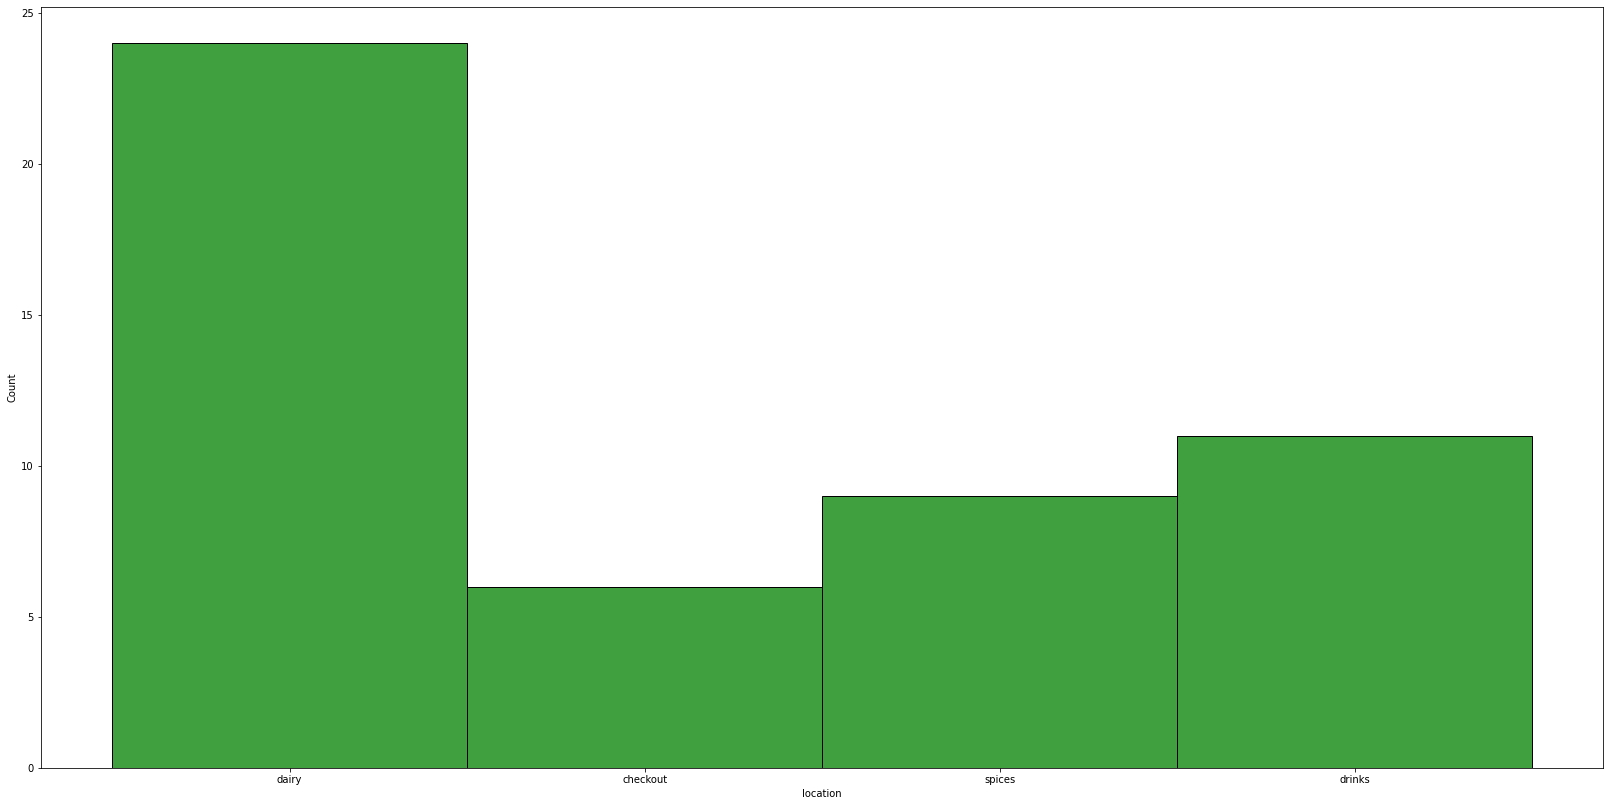

In [35]:
#Monday morning customers (Observation)

sns.histplot(df_lst[0].head(50), x="location", color='green')

<AxesSubplot:xlabel='location', ylabel='Count'>

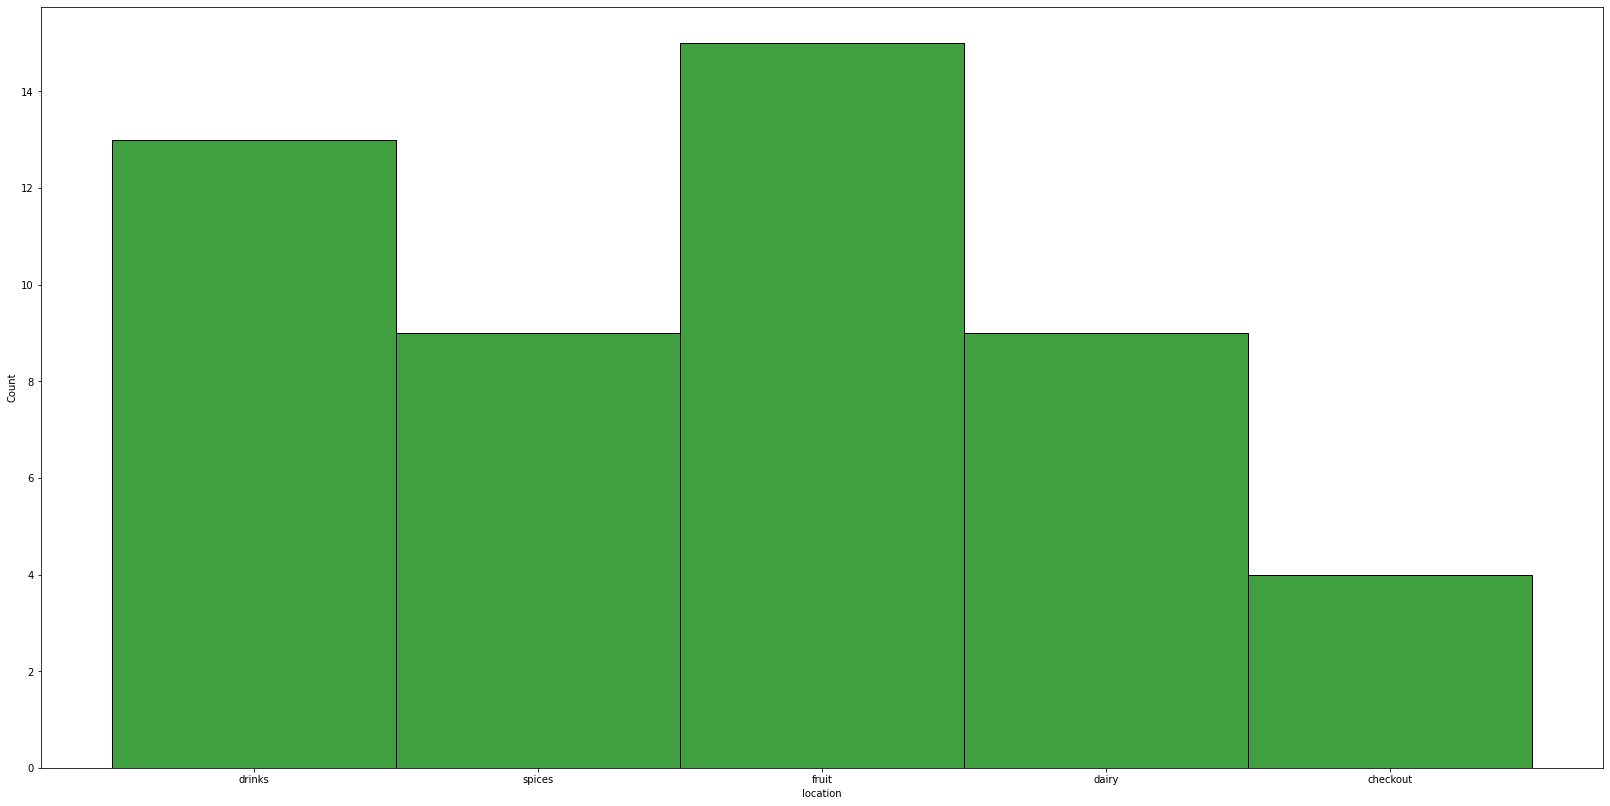

In [36]:
#Monday morning customers (simulation)
sns.histplot(df.head(50), x='location', color='green')

<AxesSubplot:xlabel='location', ylabel='Count'>

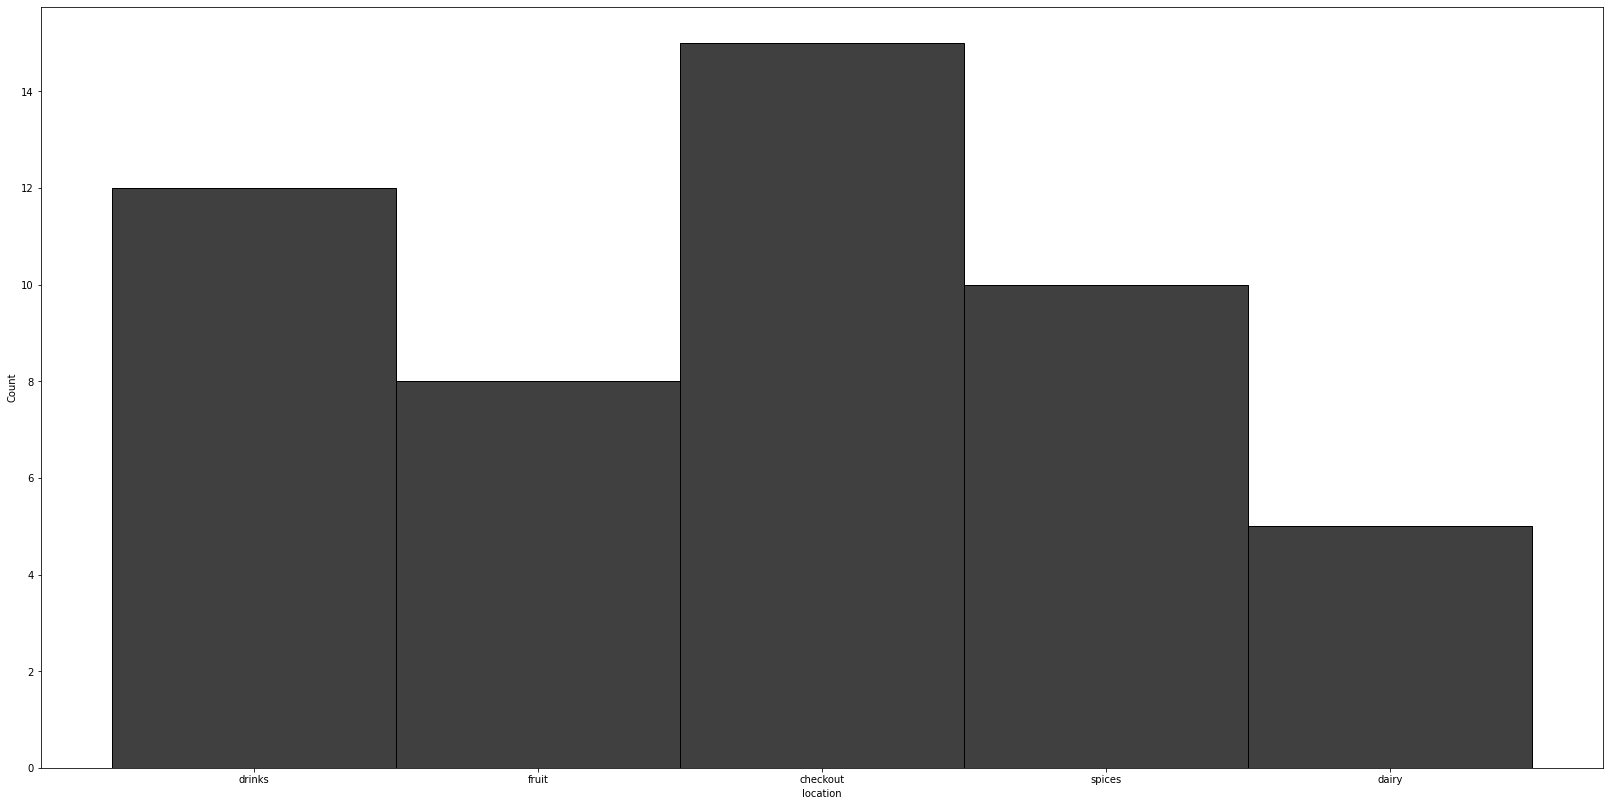

In [37]:
#Monday night customers (observation)
sns.histplot(df_lst[0].tail(50), x='location', color='black')

Simulation:

<AxesSubplot:xlabel='location', ylabel='Count'>

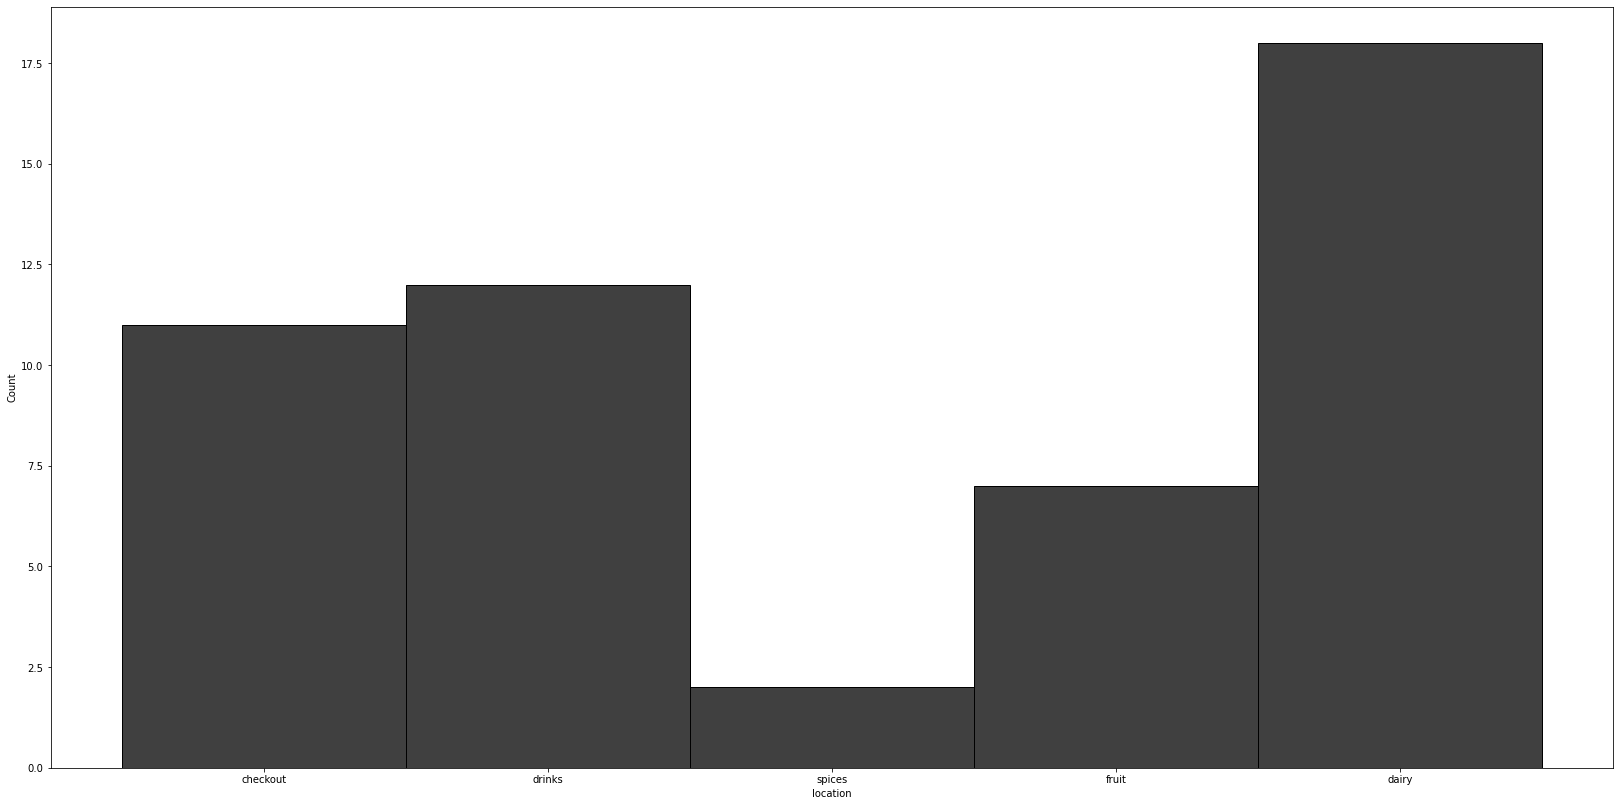

In [38]:
#Monday evening customers (simulation)
sns.histplot(df.tail(50), x='location', color='black')

In [39]:
dict

{'timestamp': ['07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:00:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:01:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:02:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:03:00',
  '07:0

In [40]:
import cv2
import time
import random
import numpy as np
import pandas as pd

TILE_SIZE = 32

MARKET = """
##WWWWWWWWWWWWWWW##
#tttttttttttttttttG
rRtDeeDtSssStFbaFt#
dRtDmmDtSppStFbaFt#
rRtDeeDtSssStFbaFt#
dRtDmmDtSppStFbaFt#
rRtDeeDtSssStFbaFt#
rRtttttttttttttttt#
CCccCCccCCccCCtttt#
##tttttttttttttttt#
##tttttttttttttttt#
##EEEEEEEEEEEEEEE##
""".strip()


class SupermarketMap:
    """Visualizes the supermarket background"""

    def __init__(self, layout, tiles):
        """
        layout : a string with each character representing a tile
        tiles   : a numpy array containing all the tile images
        """
        self.tiles = tiles
        # split the layout string into a two dimensional matrix [['#','#',..],['#','#',.]]
        self.contents = [list(row) for row in layout.split("\n")]
        self.ncols = len(self.contents[0])
        self.nrows = len(self.contents)
        # create a 3d np.zeros image with shape (384, 576, 3)
        self.image = np.zeros(
            (self.nrows*TILE_SIZE, self.ncols*TILE_SIZE, 3), dtype=np.uint8
        )
        self.prepare_map()

    def extract_tile(self, row, col):
        """extract a tile array from the tiles image"""
        # we get tile array inserting the row and col in the tiles.png where our tile is
        y = row*TILE_SIZE
        x = col*TILE_SIZE
        return self.tiles[y:y+TILE_SIZE, x:x+TILE_SIZE]

    def get_tile(self, char):
        """returns the array for a given tile character"""
        if char == "#":
            return self.extract_tile(0, 0)
        elif char == "G":
            return self.extract_tile(7, 3)
        elif char == "C":
            return self.extract_tile(2, 8)
        elif char == "b":
            return self.extract_tile(0, 4)
        elif char == "a":
            return self.extract_tile(5, 4)
        elif char == "s":
            return self.extract_tile(5, 9)
        elif char == "p":
            return self.extract_tile(6, 9)
        elif char == "e":
            return self.extract_tile(-2, -5)
        elif char == "m":
            return self.extract_tile(-4, 6)
        elif char == "d":
            return self.extract_tile(3, -3)
        elif char == "r":
            return self.extract_tile(-3, -3)
        elif char == "W":
            return self.extract_tile(0, 7)
        elif char == "E":
            return self.extract_tile(-3, -6)
        elif char == "p":
            return self.extract_tile(3, 2)
        else:
            return self.extract_tile(1, 2)

    def prepare_map(self):
        """prepares the entire image as a big numpy array"""
        # this for loops goes through the MARKET char's layout, and it creates the image
        for row, line in enumerate(self.contents):
            for col, char in enumerate(line):
                # bm give back a real tile from tiles.png
                bm = self.get_tile(char)
                y = row*TILE_SIZE
                x = col*TILE_SIZE
                self.image[y:y+TILE_SIZE, x:x+TILE_SIZE] = bm

    def draw(self, frame):
        """
        draws the image into a frame
        """
        ###
        frame[0:self.image.shape[0], 0:self.image.shape[1]] = self.image

    def write_image(self, filename):
        """writes the image into a file"""
        cv2.imwrite(filename, self.image)


class Customer_map:

    def __init__(self, name, supermarket, avatar, row, col, state=None):
        """
        supermarket: A SuperMarketMap object
        avatar : a numpy array containing a 32x32 tile image
        row: the starting row
        col: the starting column
        """

        self.name = name
        self.supermarket = supermarket
        self.state = state
        self.avatar = avatar
        self.row = row
        self.col = col

    def draw(self, frame):
        x = self.col * TILE_SIZE
        y = self.row * TILE_SIZE
        frame[y:y+TILE_SIZE, x:x+TILE_SIZE] = self.avatar

    def move(self):
        #states = ['checkout', 'dairy', 'drinks', "fruit", 'spices']
        dairy = [(2, 3), (2, 6), (3, 3), (3, 6), (4, 3),
                 (4, 6), (5, 3), (5, 6), (6, 3), (6, 6)]
        fruits = [(2, 13), (2, 16), (3, 13), (3, 16), (4, 13),
                  (4, 16), (5, 13), (5, 16), (6, 13), (6, 16)]
        drinks = [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
        spices = [(2, 8), (2, 11), (3, 8), (3, 11), (4, 8),
                  (4, 11), (5, 8), (5, 11), (6, 8), (6, 11)]
        checkout = [(8, 2), (8, 3), (8, 6), (8, 7), (8, 10), (8, 11)]

        
        ### Calculate the difference between now and the random choice
        ### moving in that direction with for loop in order to reach that column and row

        if self.state == 'fruit':
            self.row, self.col = random.choice(fruits)

        if self.state == 'checkout':
            self.row, self.col = random.choice(checkout)
            new_row = self.row
            new_col = self.col
            new_row += 3      
            self.col = new_col
            self.row = new_row

        if self.state == 'spices':
            self.row, self.col = random.choice(spices)

        if self.state == 'dairy':
            self.row, self.col = random.choice(dairy)

        if self.state == 'drinks':
            self.row, self.col = random.choice(drinks)


if __name__ == "__main__":

    # we are creating a bigger zeros array as background for our image
    background = np.zeros((500, 700, 3), np.uint8)
    tiles = cv2.imread("tiles.png")
    
    market = SupermarketMap(MARKET, tiles)
    
    df = pd.read_csv("Supermarket_01.csv", index_col=1, parse_dates=True)
    list_of_avatars = {}
    possible_avatar_pos = [(7, 0), (7, 15), (8, 15), (6, 15), (5, 14)]
    for n in range(len(list(df.customer_name.unique()))):
        r = possible_avatar_pos[n] 
        no = list(df.customer_name.unique())[n]
        customer = Customer_map(name=no, supermarket=market, avatar=market.extract_tile(r[0],r[1]), row=1, col=18)
        list_of_avatars[no] = customer

    # while True:
    lst_timestamp = dict['timestamp']
    print(lst_timestamp)
    lst_customer_name = dict['customer_name']
    print(lst_customer_name)
    lst_location = dict['location']  
    print(lst_location)
    
    while True:
        for i in range(len(lst_customer_name)):
            nome = lst_customer_name[i]
            
            for l in list_of_avatars:
                frame = background.copy()
                market.draw(frame)
                #list_of_avatars[i]
                if l==nome:
                    location = lst_location[i]
                    list_of_avatars[lst_customer_name[i]].state = location
                    list_of_avatars[lst_customer_name[i]].draw(frame)
                    time.sleep(1.5)
                    list_of_avatars[lst_customer_name[i]].move()

                #list_of_avatars[lst_customer_name[i]].state = location
                list_of_avatars[l].draw(frame)
                time.sleep(1.5)
                list_of_avatars[l].move()

                # https://www.ascii-code.com/
                key = cv2.waitKey(1)

                if key == 113:  # 'q' key
                    break

                cv2.imshow("frame", frame)

    cv2.destroyAllWindows()

    market.write_image("supermarket.png")


ModuleNotFoundError: No module named 'cv2'